In [4]:
import pandas as pd
import numpy as np
#import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
important_cols = ['respondent_id', 'agency_abbr', 'loan_type_name', 'property_type_name',
       'loan_purpose_name', 'owner_occupancy_name', 'loan_amount_000s',
       'preapproval_name', 'action_taken_name', 'msamd_name', 'state_abbr',
       'county_name', 'census_tract_number', 'applicant_ethnicity_name',
       'co_applicant_ethnicity_name', 'applicant_race_name_1',
       'applicant_race_name_2', 'applicant_race_name_3',
       'applicant_race_name_4', 'applicant_race_name_5',
       'co_applicant_race_name_1', 'co_applicant_race_name_2',
       'co_applicant_race_name_3', 'co_applicant_race_name_4',
       'co_applicant_race_name_5', 'applicant_sex_name',
       'co_applicant_sex_name', 'applicant_income_000s', 'purchaser_type_name',
       'denial_reason_name_1', 'denial_reason_name_2', 'denial_reason_name_3',
       'rate_spread', 'hoepa_status_name', 'lien_status_name', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units']
df_2017 = pd.read_csv('data/hmda_2017_nationwide_all-records_labels.csv',usecols = important_cols)
df_2017['denied'] = df_2017[['denial_reason_name_1']].applymap(lambda x : 1 if x==x else 0)
df_2017.head()

/Users/emilyramond/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,respondent_id,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loan_amount_000s,preapproval_name,action_taken_name,msamd_name,...,rate_spread,hoepa_status_name,lien_status_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,denied
0,75-2921540,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,53.0,Not applicable,Application withdrawn by applicant,Philadelphia - PA,...,NaN,Not a HOEPA loan,Secured by a first lien,3202.0,97.279999,57400.0,47.540001,710.0,1314.0,0
1,0000504713,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,168.0,Not applicable,Application denied by financial institution,"Spokane, Spokane Valley - WA",...,NaN,Not a HOEPA loan,Secured by a first lien,3733.0,4.580000,63900.0,86.239998,861.0,1241.0,1
2,7810600004,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,103.0,Not applicable,File closed for incompleteness,Salt Lake City - UT,...,NaN,Not a HOEPA loan,Secured by a first lien,5498.0,37.919998,75400.0,63.939999,1270.0,1658.0,0
3,42-1739728,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Not owner-occupied as a principal dwelling,88.0,Not applicable,Loan originated,Springfield - MO,...,NaN,Not a HOEPA loan,Secured by a first lien,3566.0,11.830000,55200.0,74.290001,573.0,1261.0,0
4,42-1739728,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,90.0,Not applicable,Application withdrawn by applicant,"Chicago, Naperville, Arlington Heights - IL",...,NaN,Not a HOEPA loan,Secured by a first lien,2910.0,48.660000,77500.0,79.250000,599.0,26.0,0


In [21]:
# Summary of all quantitative fields
df_2017.describe()

,loan_amount_000s,census_tract_number,applicant_income_000s,rate_spread,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,denied
count,1.428046e+07,1.400119e+07,1.238963e+07,493273.000000,1.400119e+07,1.400114e+07,1.400119e+07,1.400119e+07,1.400114e+07,1.400114e+07,1.428550e+07
mean,2.480836e+02,2.215633e+03,1.142200e+02,2.473063,5.720964e+03,3.273188e+01,7.083347e+04,1.130236e+02,1.465340e+03,2.004188e+03,9.883941e-02
std,1.481113e+03,3.207870e+03,2.134008e+03,1.441981,3.170171e+03,2.618514e+01,1.494926e+04,4.088793e+01,8.862358e+02,1.099152e+03,2.984463e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.500000,0.000000e+00,0.000000e+00,1.580000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120000e+02,1.034100e+02,5.100000e+01,1.660000,3.853000e+03,1.173000e+01,6.160000e+04,8.649000e+01,9.260000e+02,1.341000e+03,0.000000e+00
50%,1.850000e+02,4.060000e+02,7.900000e+01,1.900000,5.161000e+03,2.485000e+01,6.810000e+04,1.077000e+02,1.321000e+03,1.817000e+03,0.000000e+00
75%,2.900000e+02,3.502000e+03,1.230000e+02,2.490000,6.784000e+03,4.782000e+01,7.750000e+04,1.331300e+02,1.808000e+03,2.422000e+03,0.000000e+00
max,3.400000e+06,9.999990e+03,7.073045e+06,99.990000,5.381200e+04,1.000000e+02,1.315000e+05,5.074700e+02,1.952900e+04,2.539100e+04,1.000000e+00


In [8]:
# Null values for every field
df_2017.isnull().sum(axis = 0)

respondent_id                         0
agency_abbr                           0
loan_type_name                        0
property_type_name                    0
loan_purpose_name                     0
owner_occupancy_name                  0
loan_amount_000s                      5
preapproval_name                      0
action_taken_name                     0
msamd_name                         1214
state_abbr                            2
county_name                          42
census_tract_number                  62
applicant_ethnicity_name              0
co_applicant_ethnicity_name           0
applicant_race_name_1                 0
applicant_race_name_2              9949
applicant_race_name_3              9998
applicant_race_name_4             10000
applicant_race_name_5             10000
co_applicant_race_name_1              0
co_applicant_race_name_2           9971
co_applicant_race_name_3           9998
co_applicant_race_name_4          10000
co_applicant_race_name_5          10000


In [27]:
mean_denial_by_race = df_2017.groupby(['applicant_race_name_1']).mean()['denied']

<AxesSubplot:>

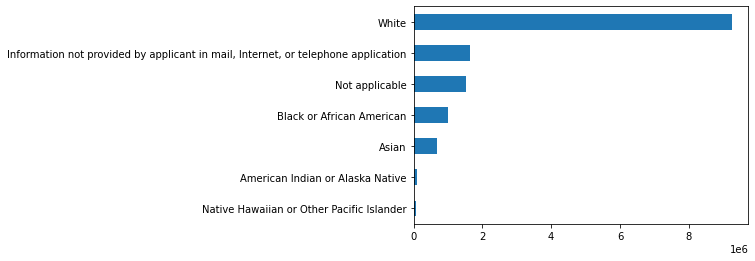

In [25]:
# Plot Value Counts of Race
df_2017['applicant_race_name_1'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:title={'center':'Rate of Denial by Race'}, ylabel='applicant_race_name_1'>

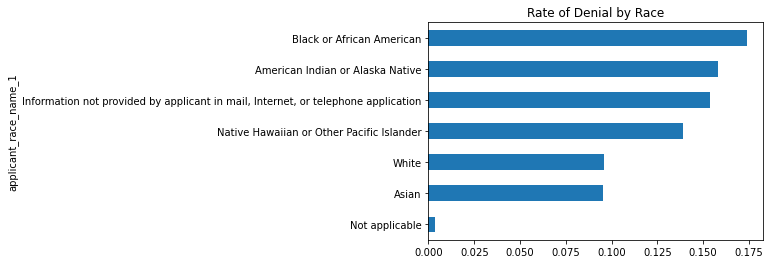

In [38]:
# Plot mean denial by race

mean_denial_by_race.sort_values().plot(kind='barh', title='Rate of Denial by Race')

# PARAGRAPH NOTES

For our project, we have decided to extract HDMA data from the consumer financial protection bureau on all records from 2017. In the future of our project, we may expand to include previous years, however, this data itself includes over 14 million observations and requires a lot of time to run and process, so including a range of data will be completed towards the end of the project, if decided. Additionally, we "randomly" select 10,000 rows for our analysis to save space/time, but will expand this to include all of the data after our code is complete. 

We have decided to focus on loan denial based on race, so we did some feature engineering to drop useless columns and create a binary column on a loan being denied/accepted. Additionally, there are several race columns, but the 2 through 5th listing had a majority of null values, so we decided to only use the first entry as the race of the individual. Since we are focusing on race, its important to note that the distribution in the data contains 64% White applicants, 11% Not provided, 10.5% Not applicable, and 13% part of a minority group. This distribution is poor, and raises other questions with the data collection that is useful for the project. However, it is still a good source for our project. For example, the mean denial rate for a white applicant [with all of the data] is .095, while the mean denial rate for an african american applicant is .174. This is a pretty drastic change, and is shown in a simple bar plot. 